## First look at altimetry "basic" data for two different satellites ##

the main point of this exercise is to show the data, and especially that altimetry data are not (for now) imagery nor swath data. Thus you won't have a grid of pixels natively. 

** Import libraries **

In [1]:
# to interpret paths and folder for any OS
import os
# math library
import numpy as np
# reading of NetCDF data
from netCDF4 import Dataset
# plotting library
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import dates
from mpl_toolkits.basemap import Basemap

#we will look at the plot within the notebooks
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,10)
plt.ioff()

** Explore what is in the different Sentinel-3 files provided (3 different files) **<br>
Sentinel-3 SRAL level 2 data are provided in three versions (all in the same zipped folder): reduced, standard and enhanced. <br>
nomenclature of the folder name is SATELLITE_SR_level_WAT or LAN_begindate_time_enddate_time_???_cycle_orbit<br>
Try the below cell on standard, reduced and enhanced file in turn. Note the differences (if only in number of variables). The use of either of these files depends on your need and/or expertise and storage capability.<br>

In [2]:
#look at what is in a Sentinel-3A SRAL file folder
#data are in a folder parallel to the current one, named data
#to change from one file to the other, comment the current one, un-comment the one to test. 
input_root = '../data/'
input_path = 'S3A_SR_2_WAT____20170809T144623_20170809T153306_20170904T084235_2802_021_025______MAR_O_NT_002.SEN3'
input_file = 'standard_measurement.nc'
#input_file = 'reduced_measurement.nc'
#input_file = 'enhanced_measurement.nc'

my_file    = os.path.join(input_root,input_path,input_file)
nc = Dataset(my_file, 'r')
# 'r' means we will only read the data, not write in the file. Highly recommended for source files. 

#list the variables within the file.
for variable in nc.variables:
    print(variable)

time_01
time_20_ku
time_20_c
UTC_day_01
UTC_sec_01
UTC_day_20_ku
UTC_sec_20_ku
UTC_day_20_c
UTC_sec_20_c
UTC_time_1hz_20_ku
UTC_time_1hz_20_c
lat_01
lon_01
lat_20_ku
lon_20_ku
lat_20_c
lon_20_c
lat_cor_20_ku
lon_cor_20_ku
lat_cor_20_c
lon_cor_20_c
surf_type_01
surf_type_20_ku
surf_type_20_c
surf_class_01
surf_class_20_ku
surf_class_20_c
rad_surf_type_01
dist_coast_01
dist_coast_20_ku
dist_coast_20_c
alt_01
alt_20_ku
alt_20_c
orb_alt_rate_01
orb_alt_rate_20_ku
orb_alt_rate_20_c
agc_01_ku
agc_01_c
agc_01_plrm_ku
agc_numval_01_ku
agc_numval_01_c
agc_numval_01_plrm_ku
agc_rms_01_ku
agc_rms_01_c
agc_rms_01_plrm_ku
range_ocean_01_ku
range_ocean_01_c
range_ocean_01_plrm_ku
range_ocean_20_ku
range_ocean_20_c
range_ocean_20_plrm_ku
range_ocean_qual_01_ku
range_ocean_qual_01_c
range_ocean_qual_01_plrm_ku
range_ocean_qual_20_ku
range_ocean_qual_20_c
range_ocean_qual_20_plrm_ku
range_ocean_rms_01_ku
range_ocean_rms_01_c
range_ocean_rms_01_plrm_ku
range_ocean_numval_01_ku
range_ocean_numval_01_c
ra

** Look at some figures **<br>
we will explore the size and statistics of the file. 

In [3]:
# choose a variable at 1 Hz for now
# e.g. we choose the range in Ku band at 1 Hz
range_ku = nc.variables['range_ocean_01_ku'][:]
#show number of points, min max
print(['array length: ', np.shape(range_ku)])
print(['minimum: ', np.min(range_ku)])
print(['maximum: ', np.max(range_ku)])
print(['mean: ', np.mean(range_ku)])
print(['mean in km: ', np.mean(range_ku)/1000])
print(['standard deviation: ', np.std(range_ku)])

#try the same on the 20 Hz(at least for the shape of the array)
range_20_ku = nc.variables['range_ocean_20_ku'][:]
#show number of points, min max
print(['array length 20Hz: ', np.shape(range_20_ku)])


['array length: ', (2170,)]
['minimum: ', 804675.28130000003]
['maximum: ', 830505.49419999996]
['mean: ', 814241.26136440213]
['mean in km: ', 814.24126136440213]
['standard deviation: ', 7895.1245587617059]
['array length 20Hz: ', (43290,)]


** Plot a variable on a map, to see where is the data is located **<br>
to see that the data is a line of measurements along the orbit, and also that a file is a half orbit.

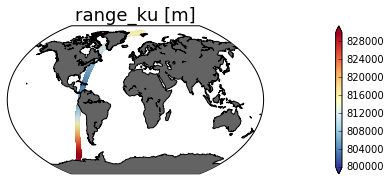

In [4]:
lat = nc.variables['lat_01'][:]
lon = nc.variables['lon_01'][:]
#we use a "fancy" projection (Kavrayskiy)
m = Basemap(projection='kav7', lon_0=0, resolution='c')
#we could also look at it on a 'globe'
#m = Basemap(projection='ortho', lon_0=-90, lat_0=0, resolution='c')
#or on a more classical planisphere
#m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='#636363')
x,y = m(lon, lat)
#vmin and vmax for the scale are the min max retreived above (rounded); the satellite is at a distance around 315 km from the surface
scatter = m.scatter(x, y, c=range_ku, cmap='RdYlBu_r', vmin=800000, vmax=830000, marker='o', edgecolors='black', linewidth=0.01)
cb = m.colorbar(scatter, pad=1, size='2.5%', extend='both')
plt.title('range_ku [m]', size=18)
plt.show()

** Plot the same variable of the same file, but only along the latitude (or time), to better see the variations **

Along track data may be usefully plotted along the time or the latitude. (Longitude is a bit more difficult to interpret, since the half orbit can begins at e.g. 200°E and ends up at 20°E)
Note that the major part of the changes along the track seen in the range are from the orbit and will be removed when altitude is substracted (major part, not all).

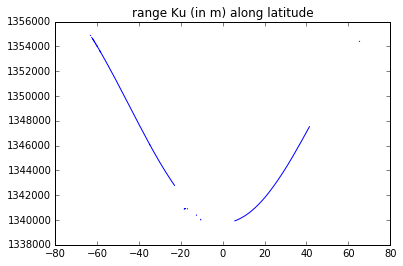

In [11]:
fig = plt.figure()
plt.plot(lat, range_ku)
plt.title('range Ku (in m) along latitude')
plt.show()

** Do the same for a Jason-3 file <br>**
note that the dataset structure is different. The file here (GDR) is the equivalent of the "standard" file. 
The file structure is also different, since there is no "SAR" variables since this mode is not on the Jason-1 to 3 satellites. 20Hz data are also organized differently. 

** Explore what is in the file provided **

In [12]:
#look at what is in a Jason-3 file
input_root = '../data/'
input_path = ''
input_file = 'JA3_GPN_2PdP050_126_20170622_042327_20170622_051940.nc'
my_file    = os.path.join(input_root,input_path,input_file)
nc = Dataset(my_file, 'r')
for variable in nc.variables:
    print(variable)

time
meas_ind
time_20hz
lat
lon
lon_20hz
lat_20hz
surface_type
alt_echo_type
rad_surf_type
rad_distance_to_land
qual_alt_1hz_range_ku
qual_alt_1hz_range_ku_mle3
qual_alt_1hz_range_c
qual_alt_1hz_swh_ku
qual_alt_1hz_swh_ku_mle3
qual_alt_1hz_swh_c
qual_alt_1hz_sig0_ku
qual_alt_1hz_sig0_ku_mle3
qual_alt_1hz_sig0_c
qual_alt_1hz_off_nadir_angle_wf_ku
qual_inst_corr_1hz_range_ku
qual_inst_corr_1hz_range_ku_mle3
qual_inst_corr_1hz_range_c
qual_inst_corr_1hz_swh_ku
qual_inst_corr_1hz_swh_ku_mle3
qual_inst_corr_1hz_swh_c
qual_inst_corr_1hz_sig0_ku
qual_inst_corr_1hz_sig0_ku_mle3
qual_inst_corr_1hz_sig0_c
qual_rad_1hz_tb187
qual_rad_1hz_tb238
qual_rad_1hz_tb340
rad_averaging_flag
rad_land_frac_187
rad_land_frac_238
rad_land_frac_340
alt_state_flag_oper
alt_state_flag_c_band
alt_state_flag_band_seq
alt_state_flag_ku_band_status
alt_state_flag_c_band_status
alt_state_flag_acq_mode_20hz
alt_state_flag_track_trans_20hz
rad_state_flag_oper
orb_state_flag_diode
orb_state_flag_rest
ecmwf_meteo_map_avai

In [13]:
# choose a variable, show number of points, min max
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
range_ku = nc.variables['range_ku'][:]
print(np.shape(range_ku))
print(np.min(range_ku))
print(np.max(range_ku))

(3328,)
1339657.2741
1354888.4929


** Plot a variable on a map, to see where is data is**

The min/max for the color scale are noticeably different from above with Sentinel-3 if plotting range_ku or altitude, due to the different altitude of Jason-3 on its orbit.<br>
Note also the min/max longitude and latitude.

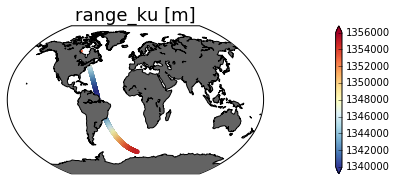

In [14]:
m = Basemap(projection='kav7',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='#636363')
x,y = m(lon, lat)
scatter = m.scatter(x, y, c=range_ku, cmap='RdYlBu_r', vmin=1340000, vmax=1356000, marker='o', edgecolors='black', linewidth=0.01)
cb = m.colorbar(scatter, pad=1, size='2.5%', extend='both')
plt.title('range_ku [m]', size=18)
plt.show()

** Plot the same variable of the same file, but only along the latitude, to better see the variations **

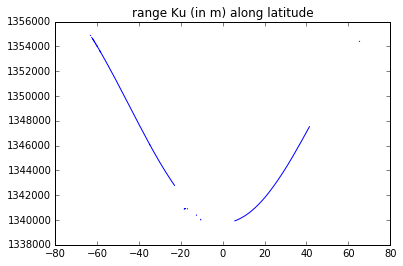

In [16]:
fig = plt.figure()
plt.plot(lat, range_ku)
plt.title('range Ku (in m) along latitude')
plt.show()